# **TASK 2:MOVIE RATING PREDICTION**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:
df = pd.read_csv("/content/IMDB-Movie-Data.csv", encoding ='latin1',header = 0)


In [8]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [9]:
df.shape

(1000, 12)

In [10]:
# Replace with actual names
print(df.head())
df.columns = ['Rank','Title', 'Genre', 'Description', 'Director','Actors','Year','Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [11]:
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


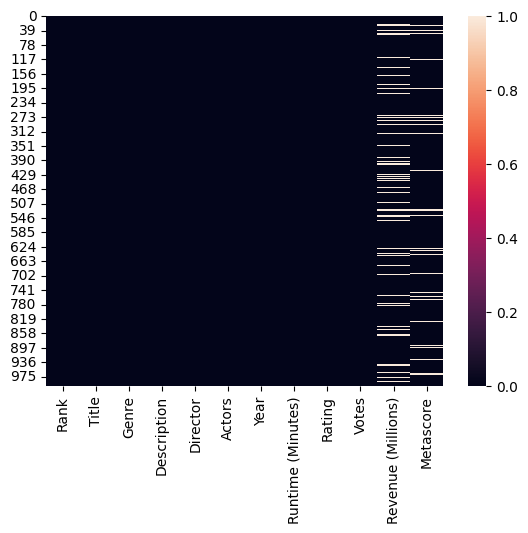

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [16]:
#to get missing value percentage
percentage_missing=df.isnull().sum()*100/len(df)
print(percentage_missing)

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64


In [15]:
#drop all missing values
df.dropna(axis=0)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [17]:
#check for duplicate data
duplicate=df.duplicated().any()
print(duplicate)

False


In [20]:
df.dropna(inplace=True)

In [18]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [22]:
df.shape

(838, 12)

In [23]:
#to get statistics about the dataframe
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

# **Data Pre-Processing**

In [25]:
#Replacing the brackets from year column
df['Year'] = df['Year'].astype(str).str.replace(r'[()]', '', regex=True).astype(int)


In [26]:
df['Year'] = df['Year'].fillna('').astype(str).str.replace(r'[()]', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')


In [27]:
print(df['Year'].head())
print(df['Year'].apply(type).value_counts())


0    2014
1    2012
2    2016
3    2016
4    2016
Name: Year, dtype: Int64
Year
<class 'int'>    838
Name: count, dtype: int64


In [30]:
#Remove the min word from 'Runtime (Minutes)' column and convert all values to numeric
df['Runtime (Minutes)'] = pd.to_numeric(
    df['Runtime (Minutes)'].astype(str).str.replace('min', '', regex=False),
    errors='coerce'
)


In [31]:
print(df['Runtime (Minutes)'].head())
print(df['Runtime (Minutes)'].apply(type).value_counts())


0    121
1    124
2    117
3    108
4    123
Name: Runtime (Minutes), dtype: int64
Runtime (Minutes)
<class 'int'>    838
Name: count, dtype: int64


In [32]:
if df['Runtime (Minutes)'].dtype.kind in 'iuf':
    print("Column is already numeric.")


Column is already numeric.


In [33]:
#Splitting the genre by, to keep only unique genres and replacing the null values with mode
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)

<ipython-input-33-edfca19a7a2f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)


In [35]:
#Convert 'Votes' to numeric and replace the , to keep only numerical part
df['Votes'] = pd.to_numeric(
    df['Votes'].astype(str).str.replace(',', '', regex=False),
    errors='coerce'
)


In [36]:
print(df['Votes'].head())
print(df['Votes'].apply(type).value_counts())


0    757074
1    485820
2    157606
3     60545
4    393727
Name: Votes, dtype: int64
Votes
<class 'int'>    838
Name: count, dtype: int64


In [37]:
if df['Votes'].dtype.kind in 'iuf':
    print("Column is already numeric.")


Column is already numeric.


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    Int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: Int64(1), float64(3), int64(3), object(5)
memory usage: 85.9+ KB


# **Data Visualizing**

Visualizing part is done to show the relationship between the features present in the dataset.

In [40]:
#Created a histogram over the years in the data
import plotly.express as px
year=px.histogram(df,x='Year', histnorm='probability density', nbins=30)
year.show()

In [46]:
#Group data by year and calculate the average rating
avg_rating_byyear=df.groupby(['Year','Genre'])['Rating'].mean().reset_index()

#get the 10 top genres
top_genres=df['Genre'].value_counts().head(10).index

#filter the data to include only top 4 genres
average_rate_byyear=avg_rating_byyear[avg_rating_byyear['Genre'].isin(top_genres)]

#create the line plot with plotly express
fig=px.line(avg_rating_byyear,x='Year',y='Rating',color='Genre')

#updating the details into chart like title
fig.update_layout(title='Average Rating by year for top genres',xaxis_title='Year',yaxis_title='Average Rating')

fig.show()

In [52]:
#Histogram shows the ratings distribution and its probable density
rating_fig=px.histogram(df,x='Rating',histnorm='probability density',nbins=40)
rating_fig.update_layout(title='Distribution of Rating',title_x=0.5,title_pad=dict(t=20),title_font=dict(size=20),xaxis_title='Rating',yaxis_title='probability Density')

rating_fig = px.histogram(df, x='Rating', histnorm='probability density', nbins=40)
rating_fig.update_layout(
    title='Distribution of Rating',
    title_x=0.5,
    xaxis_title='Rating',
    yaxis_title='Probability Density'
)
rating_fig.update_traces(marker_line_color="white", marker_line_width=1.5)
rating_fig.show()


# **Feature Engineering**

In [53]:
#importing libraries for building model

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [54]:
#Grouping the columns with their average rating and then creating a new feature

genre_mean_rating=df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating']=genre_mean_rating

director_mean_rating=df.groupby('Director')['Rating'].transform('mean')
df['Director']=genre_mean_rating

actor_mean_rating=df.groupby('Actors')['Rating'].transform('mean')
df['Actors']=genre_mean_rating



In [55]:
#keeping the predictor and target variable

x=df[['Year','Votes','Runtime (Minutes)','Genre_mean_rating','Director','Actors']]
y=df['Rating']

In [56]:
#splitting the dataset into training and testing parts

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Model Building**

In [80]:
#Building machine learning model and training them
model=LinearRegression()
model.fit(x_train,y_train)
model_predict=model.predict(x_test)

In [59]:
#Evaluating the performance of model with evaluation metrics
print('Performance evaluation of Logistic Regression is shown below: ','\n')
print('Mean squared error: ',mean_squared_error(y_test,model_predict))
print('Mean absolute error: ',mean_absolute_error(y_test,model_predict))
print('R2 score: ',r2_score(y_test,model_predict))



Performance evaluation of Logistic Regression is shown below:  

Mean squared error:  0.33807674653851943
Mean absolute error:  0.414510155992553
R2 score:  0.5735540184040395


# **Model Testing**

In [62]:
x.head(5)

,Year,Votes,Runtime (Minutes),Genre_mean_rating,Director,Actors
0,2014,757074,121,6.724000,6.724000,6.724000
1,2012,485820,124,6.850000,6.850000,6.850000
2,2016,157606,117,5.763636,5.763636,5.763636
3,2016,60545,108,7.100000,7.100000,7.100000
4,2016,393727,123,6.416000,6.416000,6.416000


In [63]:
y.head(5)

,Rating
0,8.1
1,7.0
2,7.3
3,7.2
4,6.2


In [70]:
#For testing , we create a new dataframe with values close to the any of our existing data to evaluate

data={'Year':[2019],'Votes':[36],'Runtime (Minutes)':[111],'Genre_mean_rating':[5.8],'Director':[4.5],'Actors':[5.3]}
trail=pd.DataFrame(data)

In [88]:
print(type(model_predict))
print(trail.shape)


<class 'numpy.ndarray'>
(1, 6)


In [86]:
# Predict using the trained model

rating_predicted = model.predict(trail)
print('Predicted rating:', rating_predicted[0])


Predicted rating: 5.107011749925459
